# **Chapter 11 Image Segmentation**

This is the companion file for Chapter 11.

## **Video 11.1: k-Means Clustering Algorithm.**

[![K-MEANS Clustering Algorithm](https://img.youtube.com/vi/5I3Ei69I40s/0.jpg)](https://www.youtube.com/watch?v=5I3Ei69I40s)

*Video 1: K-MEANS Clustering Algorithm.*


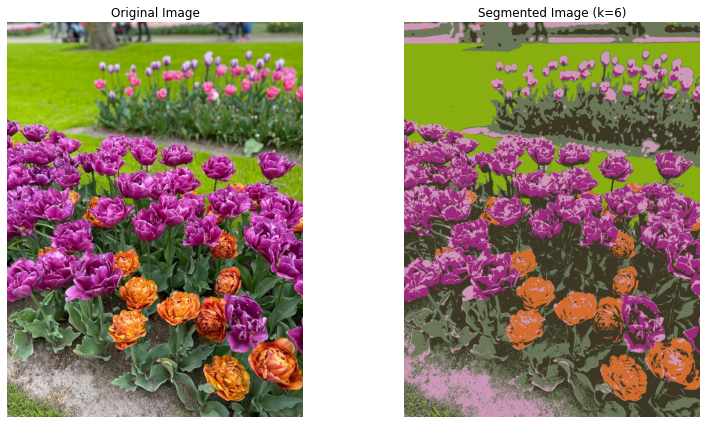

In [1]:
#K-means

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 6  # You can change this to any number of segments you want

# Load the image
image_bgr = cv2.imread('tulip2.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for K-means (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Apply K-means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (color values)
centers = np.uint8(centers)

# Map each pixel to the color of its corresponding center
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

# Save the original and segmented images
cv2.imwrite(f'segmented_image_k{k}.jpg', cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))  # Save as BGR with k in filename

# Plot the original and segmented images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Segmented Image (k={k})')
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()


Original image shape: (1600, 1200, 3)
Estimated bandwidth: 49.78323383001994
Number of estimated clusters: 4


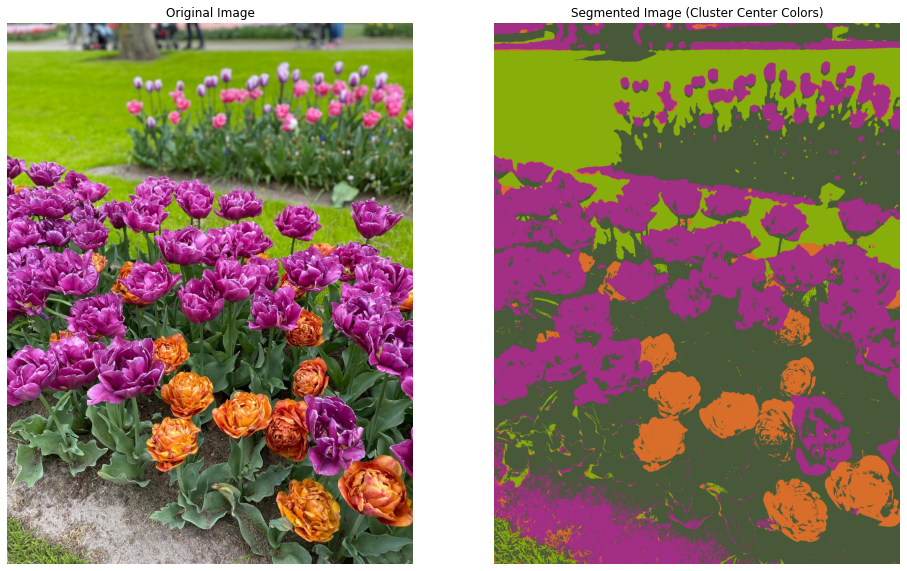

Segmented image saved as 'segmented_tulip2.jpeg'


In [4]:
#Meanshift
import numpy as np
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Load image 
image_bgr = cv2.imread('tulip2.jpeg')  # BGR format
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Store original shape (Height, Width, Channels)
original_shape = image_rgb.shape
print("Original image shape:", original_shape)

# Flatten image to shape (num_pixels, 3) for clustering
X = image_rgb.reshape(-1, 3)

# Estimate bandwidth and apply MeanShift clustering 
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print("Estimated bandwidth:", bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_  # Label for each pixel
cluster_centers = ms.cluster_centers_  # RGB color for each cluster center
n_clusters = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters)

# Reconstruct segmented image using cluster center colors
segmented_flat = cluster_centers[labels]  # shape: (H*W, 3)
segmented_image = segmented_flat.reshape(original_shape)  # shape: (H, W, 3)
segmented_image = np.clip(segmented_image, 0, 255).astype(np.uint8)

# Display segmented image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Cluster Center Colors)")
plt.axis('off')
plt.show()

# Save segmented image
segmented_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('segmented_tulip2.jpeg', segmented_bgr)
print("Segmented image saved as 'segmented_tulip2.jpeg'")


## **Video 11.2: Mean Shift?**

In [12]:
from IPython.display import HTML

HTML("""
<video width="600" controls autoplay>
  <source src="https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/mscm.mp4" type="video/mp4">
</video>
<p>Video 2: Mean Shift</p>
""")


## **Video 11.3: What is Mean Shift?**

In [13]:
from IPython.display import HTML

HTML("""
<video width="400" controls>
  <source src="https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/What_is_Mean_Shift.mp4" type="video/mp4">
</video>
<p>Video 3: What is Mean Shift?</p>
""")


# **Programming exercise 11.3:** 

1.   Run the following code to perform segmentation using thresholding.
2.   Change the threshold and see how the output changes.

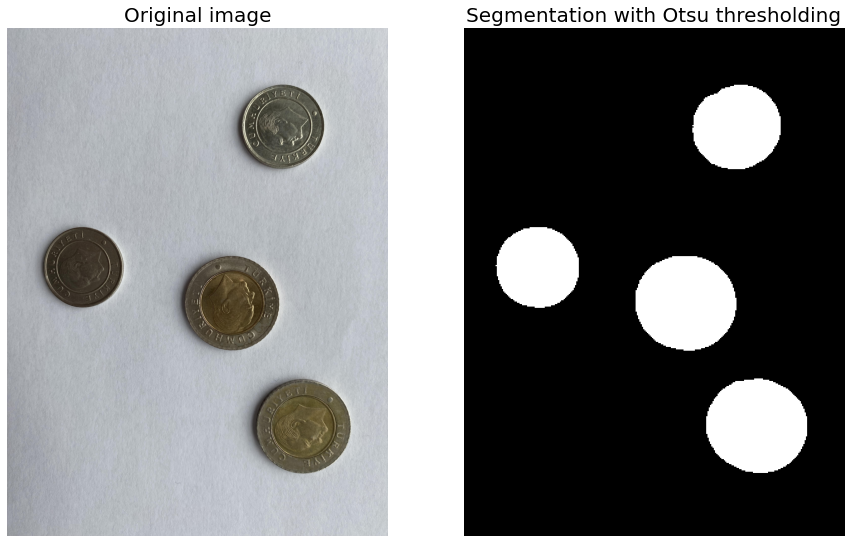

In [15]:
## Segmentation using thresholding
#Segment the coins to obtain a binary image where pixels representing the coins are set to 1.

from skimage import io, color
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.filters.rank import median
from skimage.transform import rescale
import numpy as np
from skimage import img_as_ubyte


# Load image and convert it to grayscale
!wget -cq https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/coins.jpeg
im = io.imread('coins.jpeg')
im_g = color.rgb2gray(im)
im_g = rescale(im_g, 0.1, anti_aliasing=False)

# Apply median filter
im_g = median(img_as_ubyte(im_g), disk(3))

# Find the threshold and perform segmentation
thresh = threshold_otsu(im_g)
binary = im_g > thresh

# Swap pixel values
swapped_binary = np.zeros_like(binary)
swapped_binary[binary == False] = 1

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(im, cmap="gray");
plt.title("Original image", fontsize=20);
plt.axis("off");


plt.subplot(122)
plt.imshow(swapped_binary, cmap="gray");
plt.title("Segmentation with Otsu thresholding", fontsize=20);
plt.axis("off");



## **Video 11.4: Finding Clusters in Graphs by Gilbert Strang**

[![Finding Clusters in Graphs](https://img.youtube.com/vi/cxTmmasBiC8/0.jpg)](https://www.youtube.com/watch?v=cxTmmasBiC8)

*Video 4:Finding Clusters in Graphs*


## **Video 11.5: Graph Similarity Matrix by Shi**

In [20]:
from IPython.display import HTML

HTML("""
<video width="400" controls autoplay>
  <source src="https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/shi.mp4" type="video/mp4">
</video>
<p>Video 5: Graph Similarity Matrix</p>
""")


## **Video 11.6: Graph-based Image Segmentation**

In [23]:
%%HTML
<video width="400" controls autoplay>
  <source src="https://raw.githubusercontent.com/hazalmogultay/466Images/master/W12/GraphSegmentation.mp4" type="video/mp4">
</video>
<p>
Video 6: Graph-based Image Segmentation 
</p>


# **Programming exercise 11.4:** 

1.   Run the following code to obtain superpixels and normalize cut to merge superpixels.
2.   Change compactness and number of segments parameters and observe how the superpixels change.

In [41]:
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, feature, color
from skimage.transform import rescale

img = data.chelsea()

# Generate superpixels using SLIC algorithm that segments image using k-means clustering in Color-(x,y,z) space
segments = segmentation.slic(img, compactness=100, n_segments=400)
superpixels = color.label2rgb(segments, img, kind='avg')

# Create a Region Adjacency Graph. Each node is a superpixel and the weight between adjacent superpixels represents how similar two regions are.
g = graph.rag_mean_color(img, segments, mode='similarity')

# Perform a normalized cut 
graph_cut_segments = graph.cut_normalized(segments, g, thresh=0.5)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(superpixels.astype('int'));
plt.axis('off');
plt.title('Superpixels', fontsize=20);

plt.subplot(122)
plt.imshow(out2);
plt.axis('off');
plt.title('Normalized Cuts', fontsize=20);

IndexError: index 451 is out of bounds for axis 1 with size 451

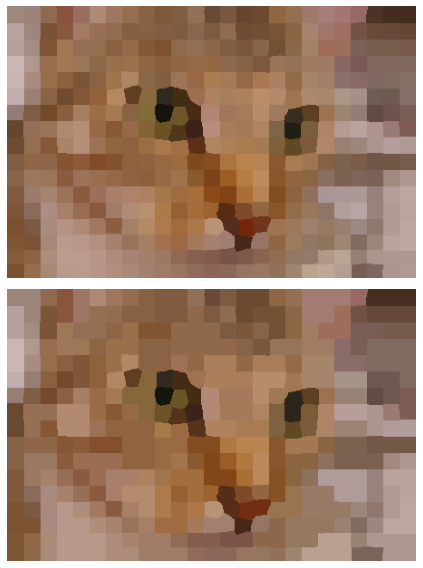

In [42]:
from skimage import data, segmentation, color
from matplotlib import pyplot as plt
from skimage.future import graph



img = data.chelsea()

labels1 = segmentation.slic(img, compactness=100, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g, thresh=0.5)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [27]:
import skimage
print(skimage.__version__)


0.19.3
